<a href="https://colab.research.google.com/github/Vergaraagustin/DataScience/blob/main/Desafio_CrossValidation_Entrega_Vergara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Estudio predictivo de abandono en tarjeta de crédito.**


Se realizará un análisis de las variables disponibles con el fin de identificar las más relevantes y significativas para predecir el abandono de los clientes potenciales o mejorando la gestión de riesgos y la experiencia del cliente.
El objetivo principal de este análisis es investigar y determinar si hay una disparidad significativa en los ingresos según las distintas variables.


**Objetivos:**

*   Analizar si existen diferencias significativas en los distintos tipos de ingresos entre hombres y mujeres.
*   Analizar si existen diferencias significativas entre los clientes potenciales que abandonan y los que no abandonan.
*   Proporcionar recomendaciones basadas en los resultados obtenidos.






##Carga de API de Kaggle.
  Se realiza carga de base y se tranforma en un dataframe

In [1]:
!rm -rf /root/.kaggle.

In [2]:
api_token = {"username":"agustinvergara",
             "key":"72856697dc569bf41ba007e185fe3cc2"}

In [3]:
!mkdir /root/.kaggle

In [4]:
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token,file)

In [5]:
!kaggle datasets download -d rikdifos/credit-card-approval-prediction

  0% 0.00/5.32M [00:00<?, ?B/s]
100% 5.32M/5.32M [00:00<00:00, 56.8MB/s]


In [6]:
import zipfile

archivo_zip = '/content/credit-card-approval-prediction.zip'


with zipfile.ZipFile(archivo_zip, 'r') as zip_file:
  for nombre_archivo in zip_file.namelist():
    print(nombre_archivo)


application_record.csv
credit_record.csv


In [7]:
import pandas as pd

nombre_archivo_csv = 'application_record.csv'

with zipfile.ZipFile(archivo_zip, 'r') as zip_file:
  with zip_file.open(nombre_archivo_csv) as archivo_csv:
    df_app = pd.read_csv(archivo_csv)

In [8]:
df_app = df_app.drop(['DAYS_BIRTH', 'FLAG_PHONE', 'FLAG_WORK_PHONE'], axis=1)

In [9]:
df_app.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

#Preparacion de codigo para ML


In [10]:
df_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,1,Sales staff,1.0


In [11]:
import numpy as np

# Definir las condiciones y los valores correspondientes
condiciones = [
    ((df_app['AMT_INCOME_TOTAL'] < 499999.00)),
    ((df_app['AMT_INCOME_TOTAL'] < 2000000.00) & (df_app['CNT_FAM_MEMBERS'] >= 1.0) & ((df_app['NAME_INCOME_TYPE'] == 'Pensioner') | (df_app['NAME_INCOME_TYPE'] =='State servant')) & ((df_app['NAME_HOUSING_TYPE'] == 'Rented apartment') | (df_app['NAME_HOUSING_TYPE'] =='Municipal apartment'))),
    ((df_app['AMT_INCOME_TOTAL'] < 2000000.00) & (df_app['CNT_FAM_MEMBERS'] > 3.0) & ((df_app['NAME_INCOME_TYPE'] == 'Commercial associate') | (df_app['NAME_INCOME_TYPE'] =='State servant')) & ((df_app['NAME_HOUSING_TYPE'] == 'House / apartment') | (df_app['NAME_HOUSING_TYPE'] =='Municipal apartment') | (df_app['NAME_HOUSING_TYPE'] =='With parents'))),
    (((df_app['AMT_INCOME_TOTAL'] > 2000000.00) & (df_app['CNT_FAM_MEMBERS'] > 5.0)) & ((df_app['NAME_INCOME_TYPE'] == 'Commercial associate') | (df_app['NAME_INCOME_TYPE'] =='Working')) & ((df_app['NAME_HOUSING_TYPE'] == 'House / apartment') | (df_app['NAME_HOUSING_TYPE'] =='With parents')) | (df_app['FLAG_OWN_REALTY'] == 'Y')),
    (((df_app['AMT_INCOME_TOTAL'] > 3100000.00) | (df_app['CNT_FAM_MEMBERS'] > 7.0)) | ((df_app['NAME_HOUSING_TYPE'] == 'House / apartment') | (df_app['NAME_HOUSING_TYPE'] =='With parents')) | (df_app['FLAG_OWN_REALTY'] == 'Y'))
]
valores = ['E', 'D', 'C', 'B','A']

df_app['Clasificacion'] = np.select(condiciones, valores, default='E')

In [12]:
df_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Clasificacion
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,NaN,2.0,E
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,NaN,2.0,E
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,Security staff,2.0,E
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,1,Sales staff,1.0,E
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,1,Sales staff,1.0,E


In [13]:
df_app.Clasificacion.value_counts()

E    433325
B      3696
A      1160
C       357
D        19
Name: Clasificacion, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X = df_app.drop('Clasificacion', axis =1)
y = df_app[["Clasificacion"]]
X = pd.get_dummies(X)

#Se seapara partes de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Logistic Regression.


##Hiperparametro.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Crear el modelo
logistic_model = LogisticRegression()

# Definir los posibles valores de C que queremos probar
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Realizar una búsqueda exhaustiva de los hiperparámetros usando validación cruzada
grid_search = GridSearchCV(logistic_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# El mejor valor para C encontrado en la búsqueda
best_C = grid_search.best_params_['C']

# Crear el modelo final con el mejor valor de C
logistic_model = LogisticRegression(C=best_C)

# Entrenar el modelo con los datos de entrenamiento
logistic_model.fit(X_train, y_train)

# Realizar predicciones en datos de prueba
y_pred_logistic = logistic_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

##Accuracy

In [16]:
from sklearn.metrics import accuracy_score

acc_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy del modelo:", acc_logistic)

Accuracy del modelo: 0.9936990757631035


##Matriz de Confusion

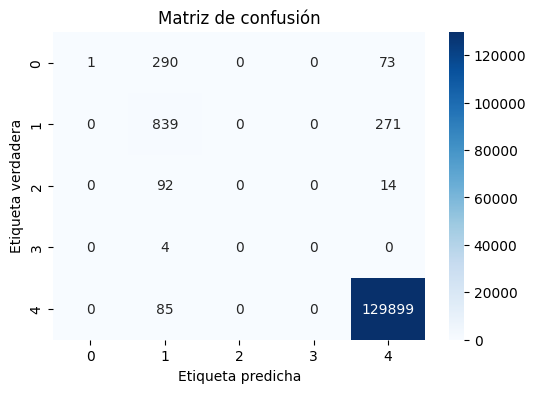

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Se genera
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
# Visualizar la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.show()

##Reportes

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logistic))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       1.00      0.00      0.01       364
           B       0.64      0.76      0.69      1110
           C       0.00      0.00      0.00       106
           D       0.00      0.00      0.00         4
           E       1.00      1.00      1.00    129984

    accuracy                           0.99    131568
   macro avg       0.53      0.35      0.34    131568
weighted avg       0.99      0.99      0.99    131568



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Curva de ROC

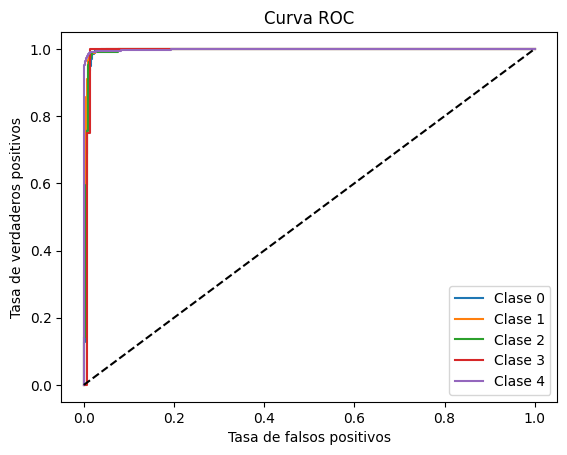

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_scores = logistic_model.predict_proba(X_test)


from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# y_test: etiquetas verdaderas
# y_scores: puntuaciones de probabilidad predichas por el modelo para cada clase

# Convertir las etiquetas verdaderas a un formato binario (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calcular las tasas de falsos positivos y verdaderos positivos para cada clase
false_positive_rate = dict()
true_positive_rate = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])

# Graficar la curva ROC para cada clase
plt.figure()

for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], label=f'Clase {i}')

plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

#Random Forest

##Hiperparametro.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Crear el modelo
rf_model = RandomForestClassifier()

# Definir los posibles valores de n_estimators y max_depth que queremos probar
param_dist = {'n_estimators': [50, 100, 200],
       'max_depth': [None, 10, 20, 30]}

# Realizar una búsqueda aleatoria de los hiperparámetros usando validación cruzada
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Los mejores valores encontrados en la búsqueda
best_n_estimators = random_search.best_params_['n_estimators']
best_max_depth = random_search.best_params_['max_depth']

# Crear el modelo final con los mejores valores de hiperparámetros
rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en datos de prueba
y_pred_rf = rf_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

##Accuracy



In [21]:
from sklearn.metrics import accuracy_score

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy del modelo:", acc_rf)

Accuracy del modelo: 1.0


##Matriz de confusion.


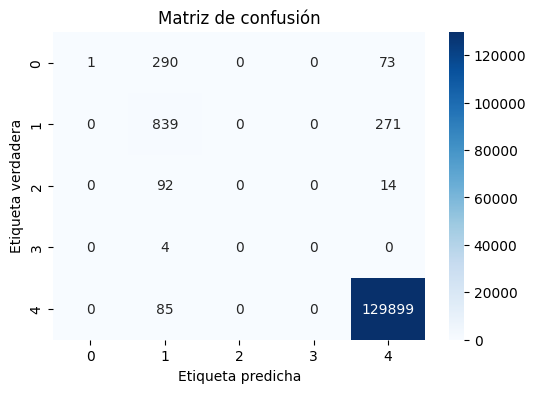

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Se genera
cm_rf = confusion_matrix(y_test, y_pred_rf)
# Visualizar la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.show()

##Reportes


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       364
           B       1.00      1.00      1.00      1110
           C       1.00      1.00      1.00       106
           D       1.00      1.00      1.00         4
           E       1.00      1.00      1.00    129984

    accuracy                           1.00    131568
   macro avg       1.00      1.00      1.00    131568
weighted avg       1.00      1.00      1.00    131568



##Curva de ROC

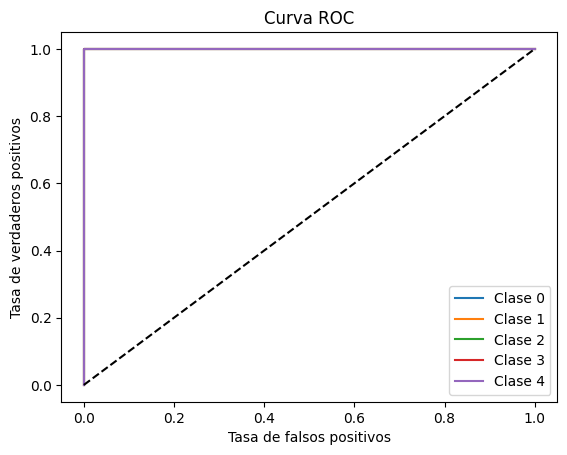

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_scores = rf_model.predict_proba(X_test)


from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# y_test: etiquetas verdaderas
# y_scores: puntuaciones de probabilidad predichas por el modelo para cada clase

# Convertir las etiquetas verdaderas a un formato binario (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calcular las tasas de falsos positivos y verdaderos positivos para cada clase
false_positive_rate = dict()
true_positive_rate = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])

# Graficar la curva ROC para cada clase
plt.figure()

for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], label=f'Clase {i}')

plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

#GBOOST

##Hiperparametros.

In [25]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

y_2 = y

# Convertir las etiquetas de clase a valores numéricos
label_encoder = LabelEncoder()
y_2 = label_encoder.fit_transform(y_2)

#Se seapara partes de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y_2, test_size=0.3, random_state=42)

# Crear el modelo
xgb_model = xgb.XGBClassifier()

# Definir los posibles valores de learning_rate y max_depth que queremos probar
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
       'max_depth': [3, 5, 7]}

# Realizar una búsqueda exhaustiva de los hiperparámetros usando validación cruzada
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Los mejores valores encontrados en la búsqueda
best_learning_rate = grid_search.best_params_['learning_rate']
best_max_depth = grid_search.best_params_['max_depth']

# Crear el modelo final con los mejores valores de hiperparámetros
xgb_model = xgb.XGBClassifier(learning_rate=best_learning_rate, max_depth=best_max_depth)

# Entrenar el modelo con los datos de entrenamiento
xgb_model.fit(X_train, y_train)

# Realizar predicciones en datos de prueba
y_pred_xgb = xgb_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Accuracy

In [26]:
from sklearn.metrics import accuracy_score

acc_gboost = accuracy_score(y_test, y_pred_xgb)
print("Accuracy del modelo:", acc_gboost)

Accuracy del modelo: 1.0


##Matriz de confusion.


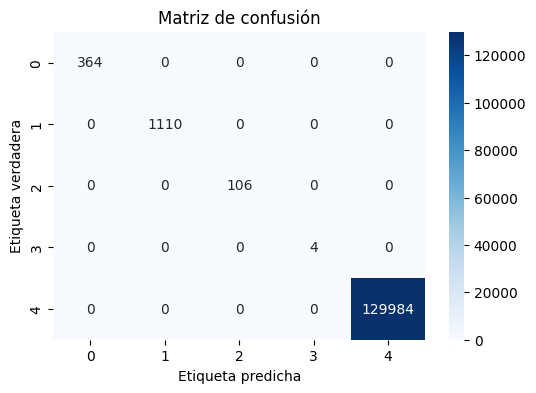

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Se genera
cm_gboost = confusion_matrix(y_test, y_pred_xgb)
# Visualizar la matriz de confusión utilizando un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gboost, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.show()

##

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       364
           1       1.00      1.00      1.00      1110
           2       1.00      1.00      1.00       106
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00    129984

    accuracy                           1.00    131568
   macro avg       1.00      1.00      1.00    131568
weighted avg       1.00      1.00      1.00    131568



##



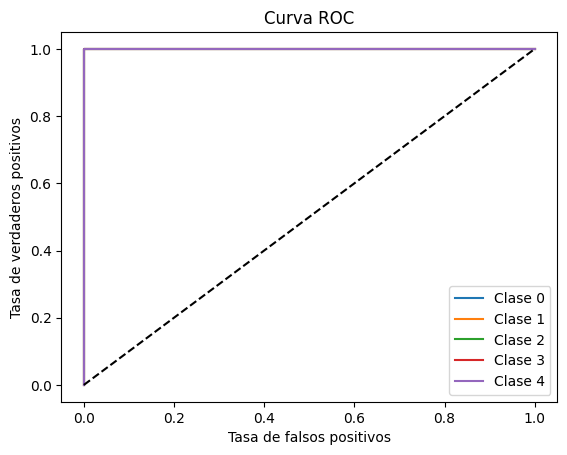

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_scores = xgb_model.predict_proba(X_test)


from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# y_test: etiquetas verdaderas
# y_scores: puntuaciones de probabilidad predichas por el modelo para cada clase

# Convertir las etiquetas verdaderas a un formato binario (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calcular las tasas de falsos positivos y verdaderos positivos para cada clase
false_positive_rate = dict()
true_positive_rate = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])

# Graficar la curva ROC para cada clase
plt.figure()

for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], label=f'Clase {i}')

plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()